In [1]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
titanic=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')

In [3]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
#count no of rows and columns in dataset
titanic.shape

(891, 12)

In [5]:
##Total no of rows=891 and columns=12

In [6]:
#Get some statistics
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


age count is less hence there are null values

In [7]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

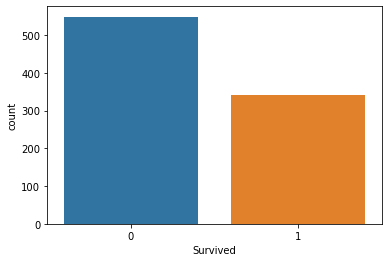

In [8]:
#Visual count of survivors
sns.countplot(titanic['Survived'])
plt.show()

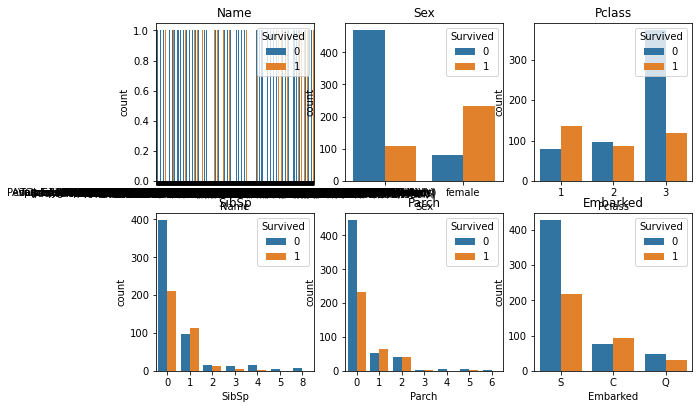

<Figure size 432x288 with 0 Axes>

In [9]:
cols=['Name','Sex','Pclass','SibSp','Parch','Embarked']
n_rows=2
n_cols=3
fig,axs=plt.subplots(n_rows,n_cols,figsize=(n_cols*3.2,n_rows*3.2))
for r in range(0,n_rows):
    for c in range(0,n_cols):
        i=r*n_cols+c
        ax=axs[r][c]
        sns.countplot(titanic[cols[i]],hue=titanic['Survived'],ax=ax)
        ax.set_title(cols[i])
        ax.legend(title='Survived',loc='upper right')
plt.show()
plt.tight_layout()


majority of men,Pclass=3,SibSp=0,Parch=0,Embarked=S did not survive

In [10]:
#look survival rate by sex
titanic.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [11]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We have 177 missing values in age and 687 values in cabin

In [12]:
for val in titanic.columns:
    print(titanic[val].value_counts())
    print()

891    1
293    1
304    1
303    1
302    1
      ..
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, Length: 891, dtype: int64

0    549
1    342
Name: Survived, dtype: int64

3    491
1    216
2    184
Name: Pclass, dtype: int64

Calic, Mr. Petar                           1
Dowdell, Miss. Elizabeth                   1
Lester, Mr. James                          1
Johnson, Mr. William Cahoone Jr            1
Rogers, Mr. William John                   1
                                          ..
Emanuel, Miss. Virginia Ethel              1
Vanden Steen, Mr. Leo Peter                1
Blackwell, Mr. Stephen Weart               1
Myhrman, Mr. Pehr Fabian Oliver Malkolm    1
O'Driscoll, Miss. Bridget                  1
Name: Name, Length: 891, dtype: int64

male      577
female    314
Name: Sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int

In [13]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Cabin,name,passenger_id will not affect dataset

In [14]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
#cabin will not affect dataframe much

In [16]:
##Handling missing values

In [17]:
titanic.drop('Cabin',axis=1,inplace=True)

In [18]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [19]:
#replacing missing values of age with mean value
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)

In [20]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [21]:
##filling Embarked with most frequent values
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0],inplace=True)

In [22]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

no null values

Encoding categorical data

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le=LabelEncoder()

In [25]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [26]:
cols=['Sex','Embarked']
for col in cols:
    titanic[col]=le.fit_transform(titanic[col])

In [27]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,0


In [28]:
titanic.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex           -0.618921
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
Embarked      -1.264823
dtype: float64

In [29]:
import numpy as np
titanic.skew()
for col in titanic.skew().index:
    if col in titanic.columns:
        if titanic.skew().loc[col]>0.65:
            titanic[col]=np.sqrt(titanic[col])
        if titanic.skew().loc[col]<-0.65:
            titanic[col]=np.cbrt(titanic[col])

In [30]:
titanic.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex           -0.618921
Age            0.434488
SibSp          1.436526
Parch          1.529799
Fare           2.085004
Embarked      -1.520662
dtype: float64

In [31]:
titanic.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033207,-0.063602,0.000348,0.004035,0.006254
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.069809,0.043535,0.121652,0.312508,-0.170667
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.331339,0.006049,-0.006792,-0.660850,0.212893
Sex,0.042939,-0.543351,0.131900,1.000000,0.084153,-0.173428,-0.257096,-0.237325,0.094886
Age,0.033207,-0.069809,-0.331339,0.084153,1.000000,-0.217329,-0.237261,0.108745,-0.030306
SibSp,-0.063602,0.043535,0.006049,-0.173428,-0.217329,1.000000,0.473591,0.309346,0.021656
Parch,0.000348,0.121652,-0.006792,-0.257096,-0.237261,0.473591,1.000000,0.320344,0.002304
Fare,0.004035,0.312508,-0.660850,-0.237325,0.108745,0.309346,0.320344,1.000000,-0.263657
Embarked,0.006254,-0.170667,0.212893,0.094886,-0.030306,0.021656,0.002304,-0.263657,1.000000


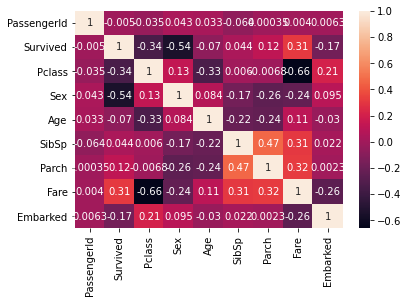

In [32]:
sns.heatmap(titanic.corr(),annot=True)
plt.show()

In [33]:
#Correlation summary- dataset is highly negatively correlated with sex

In [34]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1.0,0.000000,A/5 21171,2.692582,1.259921
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1.0,0.000000,PC 17599,8.442944,0.000000
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0.0,0.000000,STON/O2. 3101282,2.815138,1.259921
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1.0,0.000000,113803,7.286975,1.259921
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0.0,0.000000,373450,2.837252,1.259921
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0.0,0.000000,211536,3.605551,1.259921
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0.0,0.000000,112053,5.477226,1.259921
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1.0,1.414214,W./C. 6607,4.842520,1.259921
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0.0,0.000000,111369,5.477226,0.000000


In [35]:
titanic.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

Sex is highly negatively correlated with Survived columns

In [36]:
threshold=3
from scipy.stats import zscore
z=np.abs(zscore(titanic))

In [37]:
np.where(z>3)

(array([ 13,  25,  27,  59,  71,  88,  96, 116, 118, 159, 167, 180, 201,
        258, 299, 311, 324, 341, 360, 377, 380, 386, 438, 438, 480, 493,
        527, 557, 567, 610, 630, 638, 672, 678, 679, 683, 689, 700, 716,
        730, 737, 742, 745, 779, 792, 846, 851, 863, 885], dtype=int64),
 array([5, 5, 6, 4, 4, 6, 3, 3, 6, 4, 5, 4, 4, 6, 6, 6, 4, 6, 5, 6, 6, 4,
        5, 6, 4, 3, 6, 6, 5, 5, 3, 5, 3, 5, 6, 4, 6, 6, 6, 6, 6, 6, 3, 6,
        4, 4, 3, 4, 5], dtype=int64))

In [38]:
titanic=titanic[(z<3).all(axis=1)]

In [41]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()

In [42]:
x=titanic.drop(['Survived'],axis=1)

In [43]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1.0,0.000000,2.692582,1.259921
1,1,0,38.000000,1.0,0.000000,8.442944,0.000000
2,3,0,26.000000,0.0,0.000000,2.815138,1.259921
3,1,0,35.000000,1.0,0.000000,7.286975,1.259921
4,3,1,35.000000,0.0,0.000000,2.837252,1.259921
...,...,...,...,...,...,...,...
886,2,1,27.000000,0.0,0.000000,3.605551,1.259921
887,1,0,19.000000,0.0,0.000000,5.477226,1.259921
888,3,0,29.699118,1.0,1.414214,4.842520,1.259921
889,1,1,26.000000,0.0,0.000000,5.477226,0.000000


In [44]:
y=titanic['Survived']

In [45]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 843, dtype: int64

In [46]:
y.value_counts()

0    517
1    326
Name: Survived, dtype: int64

In [48]:
x_over,y_over=smt.fit_resample(x,y)

In [49]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x_over)

In [50]:
y=y_over

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [52]:
lg=LogisticRegression()


In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=43,test_size=.33)

In [54]:
x_train.shape

(692, 7)

In [55]:
y_train.shape

(692,)

Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)


LogisticRegression()

In [57]:
pred_lg=lg.predict(x_test)

In [58]:
accuracy_score(pred_lg,y_test)

0.8070175438596491

In [59]:
confusion_matrix(pred_lg,y_test)

array([[137,  31],
       [ 35, 139]], dtype=int64)

In [60]:
print(classification_report(pred_lg,y_test))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       168
           1       0.82      0.80      0.81       174

    accuracy                           0.81       342
   macro avg       0.81      0.81      0.81       342
weighted avg       0.81      0.81      0.81       342



In [61]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [62]:
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
gb=GaussianNB()

In [63]:
param={'kernel':['linear','rbf','poly','sigmoid']}
gd=GridSearchCV(svc,param,cv=5)
gd.fit(x,y)
print(gd.best_params_)

{'kernel': 'poly'}


In [64]:
param={'criterion':['ginny','entropy'],'splitter':['best','random'],'max_features':['none','auto','sqrt','log2']}
gd=GridSearchCV(dtc,param,cv=5)
gd.fit(x,y)
print(gd.best_params_)

{'criterion': 'entropy', 'max_features': 'auto', 'splitter': 'random'}


In [65]:
param={'n_neighbors':[7,5,9,11,15],'weights':['uniform','distance'],'algorithm':['auto','bell_tree','kd_tree','brute']}
gd=GridSearchCV(knn,param,cv=5)
gd.fit(x,y)
print(gd.best_params_)

{'algorithm': 'auto', 'n_neighbors': 11, 'weights': 'distance'}


In [67]:
svc=SVC(kernel='poly')
dtc=DecisionTreeClassifier(criterion='entropy',max_features='auto',splitter='random')
knn=KNeighborsClassifier(n_neighbors=11,algorithm='auto',weights='distance')

In [68]:
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print(accuracy_score(y_test,pred),'\n',confusion_matrix(y_test,pred),'\n',classification_report(y_test,pred))

In [69]:
fun(svc)

0.8187134502923976 
 [[144  28]
 [ 34 136]] 
               precision    recall  f1-score   support

           0       0.81      0.84      0.82       172
           1       0.83      0.80      0.81       170

    accuracy                           0.82       342
   macro avg       0.82      0.82      0.82       342
weighted avg       0.82      0.82      0.82       342



In [70]:
fun(dtc)

0.7865497076023392 
 [[126  46]
 [ 27 143]] 
               precision    recall  f1-score   support

           0       0.82      0.73      0.78       172
           1       0.76      0.84      0.80       170

    accuracy                           0.79       342
   macro avg       0.79      0.79      0.79       342
weighted avg       0.79      0.79      0.79       342



In [71]:
fun(gb)

0.7777777777777778 
 [[127  45]
 [ 31 139]] 
               precision    recall  f1-score   support

           0       0.80      0.74      0.77       172
           1       0.76      0.82      0.79       170

    accuracy                           0.78       342
   macro avg       0.78      0.78      0.78       342
weighted avg       0.78      0.78      0.78       342



In [72]:
fun(knn)

0.8216374269005848 
 [[135  37]
 [ 24 146]] 
               precision    recall  f1-score   support

           0       0.85      0.78      0.82       172
           1       0.80      0.86      0.83       170

    accuracy                           0.82       342
   macro avg       0.82      0.82      0.82       342
weighted avg       0.82      0.82      0.82       342



Cross Validation

In [73]:
from sklearn.model_selection import cross_val_score,KFold

In [74]:
def cvs(m):
    score=cross_val_score(m,x,y,cv=5)
    print(score)
    print(score.mean())

In [75]:
cvs(svc)

[0.74396135 0.79710145 0.77294686 0.83091787 0.8592233 ]
0.8008301674405516


In [76]:
cvs(dtc)

[0.68115942 0.77777778 0.76811594 0.85024155 0.82524272]
0.7805074808873881


In [77]:
cvs(knn)

[0.76811594 0.82608696 0.79227053 0.85990338 0.80097087]
0.8094695370761222


In [78]:
cvs(gb)

[0.69082126 0.77294686 0.75845411 0.79227053 0.77669903]
0.7582383565498805


In [79]:
cvs(lg)

[0.77294686 0.80676329 0.74396135 0.79710145 0.80582524]
0.7853196379156699


In [80]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [81]:
rf=RandomForestClassifier()
ad=AdaBoostClassifier()
Gd=GradientBoostingClassifier()

In [82]:
param={'n_estimators':[100,200,300,400,500],'random_state':[23,43,56,78,95]}
gd=GridSearchCV(rf,param,cv=5)
gd.fit(x,y)
print(gd.best_params_)

{'n_estimators': 100, 'random_state': 43}


In [83]:
rf=RandomForestClassifier(n_estimators=100,random_state=43)

In [84]:
fun(rf)

0.8391812865497076 
 [[140  32]
 [ 23 147]] 
               precision    recall  f1-score   support

           0       0.86      0.81      0.84       172
           1       0.82      0.86      0.84       170

    accuracy                           0.84       342
   macro avg       0.84      0.84      0.84       342
weighted avg       0.84      0.84      0.84       342



In [85]:
cvs(rf)

[0.77294686 0.83091787 0.81642512 0.8647343  0.85436893]
0.8278786173256414


In [86]:
param={'n_estimators':[100,200,300,400,500],'random_state':[23,43,56,78,95]}
grid=GridSearchCV(Gd,param,cv=5)
grid.fit(x,y)
print(grid.best_params_)

{'n_estimators': 300, 'random_state': 95}


In [87]:
Gd=GradientBoostingClassifier(n_estimators=300,random_state=95)

In [88]:
fun(Gd)

0.8304093567251462 
 [[141  31]
 [ 27 143]] 
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       172
           1       0.82      0.84      0.83       170

    accuracy                           0.83       342
   macro avg       0.83      0.83      0.83       342
weighted avg       0.83      0.83      0.83       342



In [89]:
cvs(Gd)

[0.75845411 0.84057971 0.80676329 0.86956522 0.84466019]
0.8240045026030673


In [90]:
fun(ad)

0.8099415204678363 
 [[137  35]
 [ 30 140]] 
               precision    recall  f1-score   support

           0       0.82      0.80      0.81       172
           1       0.80      0.82      0.81       170

    accuracy                           0.81       342
   macro avg       0.81      0.81      0.81       342
weighted avg       0.81      0.81      0.81       342



In [91]:
cvs(ad)

[0.71980676 0.8115942  0.78743961 0.84057971 0.81067961]
0.7940199803011115


In [92]:
!pip install xgboost
from xgboost import XGBClassifier

In [93]:
xgb=XGBClassifier()

In [94]:
fun(xgb)

[12:34:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8596491228070176 
 [[144  28]
 [ 20 150]] 
               precision    recall  f1-score   support

           0       0.88      0.84      0.86       172
           1       0.84      0.88      0.86       170

    accuracy                           0.86       342
   macro avg       0.86      0.86      0.86       342
weighted avg       0.86      0.86      0.86       342



In [95]:
cvs(xgb)

[12:34:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:34:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:34:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:34:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [96]:
from sklearn.ensemble import VotingClassifier

In [97]:
estimator=[]
estimator.append(('svc',svc))
estimator.append(('dtc',dtc))
estimator.append(('knn',knn))
estimator.append(('Gb',gb))

In [98]:
vot_soft=VotingClassifier(estimators=estimator,voting='hard')

In [99]:
fun(vot_soft)

0.8362573099415205 
 [[147  25]
 [ 31 139]] 
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       172
           1       0.85      0.82      0.83       170

    accuracy                           0.84       342
   macro avg       0.84      0.84      0.84       342
weighted avg       0.84      0.84      0.84       342



In [100]:
cvs(vot_soft)

[0.77777778 0.82608696 0.80676329 0.85024155 0.83495146]
0.8191642043056142


Since the difference between cross val scoree and accuracy is least for Gd and is having maximum accuracy.Saving Gd

# AUC-ROC Curve

In [101]:
from sklearn.metrics import roc_curve,roc_auc_score

In [102]:
y_pred_prob=Gd.predict_proba(x_test)[:,1]

In [103]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [104]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00581395, 0.00581395, 0.00581395, 0.00581395, 0.01162791,
       0.01162791, 0.01744186, 0.01744186, 0.02325581, 0.02325581,
       0.02906977, 0.02906977, 0.02906977, 0.02906977, 0.03488372,
       0.03488372, 0.04069767, 0.04069767, 0.05232558, 0.05232558,
       0.05813953, 0.05813953, 0.06395349, 0.06395349, 0.06395349,
       0.06976744, 0.06976744, 0.0755814 , 0.0755814 , 0.0872093 ,
       0.0872093 , 0.09302326, 0.09302326, 0.10465116, 0.11046512,
       0.13372093, 0.13372093, 0.14534884, 0.14534884, 0.15116279,
       0.15116279, 0.15697674, 0.15697674, 0.18023256, 0.18023256,
       0.19767442, 0.19767442, 0.22093023, 0.22093023, 0.23837209,
       0.23837209, 0.25581395, 0.25581395, 0.27906977, 0.27906977,
       0.30232558, 0.30232558, 0.31976744, 0.31976744, 0.31976744,
       0.35465116, 0.36627907, 0.37790698, 0.37790698, 0.38953488,
       0.40116279, 0.4127907 , 0.4127907 , 0.47674419, 0.47674

In [105]:
tpr

array([0.        , 0.00588235, 0.06470588, 0.07647059, 0.22352941,
       0.22352941, 0.41176471, 0.42941176, 0.43529412, 0.43529412,
       0.44117647, 0.44117647, 0.45294118, 0.45882353, 0.47058824,
       0.47058824, 0.50588235, 0.51764706, 0.57058824, 0.6       ,
       0.62352941, 0.62352941, 0.62941176, 0.62941176, 0.63529412,
       0.63529412, 0.66470588, 0.66470588, 0.67058824, 0.68235294,
       0.68235294, 0.70588235, 0.70588235, 0.72941176, 0.72941176,
       0.73529412, 0.74117647, 0.79411765, 0.79411765, 0.8       ,
       0.8       , 0.81176471, 0.81176471, 0.81764706, 0.81764706,
       0.82352941, 0.82352941, 0.84117647, 0.84117647, 0.84705882,
       0.84705882, 0.85882353, 0.85882353, 0.88235294, 0.88235294,
       0.88823529, 0.88823529, 0.9       , 0.9       , 0.90588235,
       0.90588235, 0.91176471, 0.91176471, 0.92352941, 0.92941176,
       0.92941176, 0.92941176, 0.92941176, 0.93529412, 0.93529412,
       0.93529412, 0.93529412, 0.94117647, 0.94117647, 0.94705

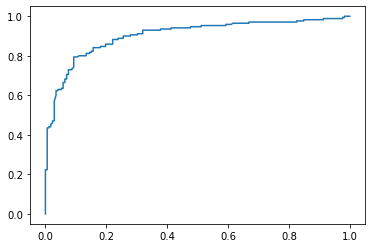

In [106]:
plt.plot(fpr,tpr)
plt.show()

In [107]:
#Saving model
import pickle
filename='titanic_survival_predictions.pkl'
pickle.dump(Gd,open(filename,'wb'))

In [108]:
##Conclusion

In [109]:
res=pd.DataFrame()
res['Actual']=y_test
res['Predict']=Gd.predict(x_test)
print(res)

     Actual  Predict
564       0        0
122       0        0
400       0        0
953       1        1
134       0        0
..      ...      ...
90        1        0
865       1        1
979       1        1
45        0        0
416       0        0

[342 rows x 2 columns]
